**Notes Removed Broken Slices Results**

* Removing damaged image slices caused an improvement in the SVC classifier surpassing the no information baseline.

In [1]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

from mpl_toolkits.axes_grid1.axes_divider import make_axes_locatable
from mpl_toolkits.axes_grid1.colorbar import colorbar

%matplotlib inline

In [2]:
def format_estimator_labels(labels):
    
    mapper = {
        'QuadraticDiscriminantEstimator': 'QDA',
        'ExtraTreesEstimator': 'Extra Trees',
        'KNNEstimator': 'KNN',
        'LightGBM': 'LightGBM',
        'LogRegEstimator': 'Logistic Regression',
        'RFEstimator': 'Random Forest',
        'SVCEstimator': 'SVC',
        'DTreeEstimator': 'Decision Tree', 
        'XGBoost': 'XGBoost',
        'RidgeClassifier': 'Ridge Classifier'
    }
    new_labels = []
    for label in labels:
        new_labels.append(mapper[label])
        
    return new_labels

In [3]:
def format_selector_labels(labels):
    
    mapper = {
        'ChiSquareSelection': 'Chi Square',
        'DummySelection': 'No Feature\nSelection',
        'WilcoxonSelection': 'Wilcoxon',
        'FisherScoreSelection': 'Fisher Score',
        'MultiSURFSelection': 'MultiSURF',
        'MutualInformationSelection': 'Mutual\nInformation',
        'ReliefFSelection': 'ReliefF'
    }
    new_labels = []
    for label in labels:
        new_labels.append(mapper[label])
        
    return new_labels

In [4]:
def gen_heatmap(results, kind='test_score'):
    
    _selector_lbls, _estimator_lbls = [], []
    for label in np.unique(results['experiment_id']):

        selector_lbl, estimator_lbl = label.split('_')

        _selector_lbls.append(selector_lbl)
        _estimator_lbls.append(estimator_lbl)

    selector_lbls = np.unique(_selector_lbls)
    estimator_lbls = np.unique(_estimator_lbls)
    
    
    results_mat = np.zeros((len(estimator_lbls), len(selector_lbls)))
    for row_num, estimator_lbl in enumerate(estimator_lbls):
        for col_num, selector_lbl in enumerate(selector_lbls):

            label = f'{selector_lbl}_{estimator_lbl}'
            location = np.where(label == np.array(results['experiment_id']))
            scores = results.iloc[np.squeeze(location), :][kind]

            results_mat[row_num, col_num] = np.mean(scores)
    
    return results_mat, selector_lbls, estimator_lbls

# Original Images

In [5]:
results_orig = pd.read_csv(
    './../../data_source/results/original_images/results_all_features_original_images.csv',
    index_col=0
)
results_orig.head()

,exp_id,experiment_id,QuadraticDiscriminantEstimator__reg_param,test_score,train_score,test_score_variance,train_score_variance,feature_votes,target_test_support,target_train_support,...,RFEstimator__n_estimators,KNNEstimator__leaf_size,KNNEstimator__metric,KNNEstimator__n_neighbors,KNNEstimator__p,DTreeEstimator__criterion,DTreeEstimator__max_depth,DTreeEstimator__max_features,DTreeEstimator__min_samples_leaf,exp_duration
0,0,DummySelection_QuadraticDiscriminantEstimator,0.000093,0.573718,0.994155,0.005760,0.000023,[5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5...,[0 0],[670 320],...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,3,DummySelection_QuadraticDiscriminantEstimator,0.001000,0.558974,0.968854,0.006729,0.000272,[5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5...,[0 0],[670 320],...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,DummySelection_QuadraticDiscriminantEstimator,0.001000,0.558974,0.968854,0.006729,0.000272,[5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5...,[0 0],[670 320],...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,39,DummySelection_QuadraticDiscriminantEstimator,0.320837,0.548077,0.747602,0.003981,0.000360,[5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5...,[0 0],[670 320],...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,9,DummySelection_QuadraticDiscriminantEstimator,0.001000,0.562821,0.972624,0.001580,0.000055,[5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5...,[0 0],[670 320],...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
results_orig.shape

(2800, 53)

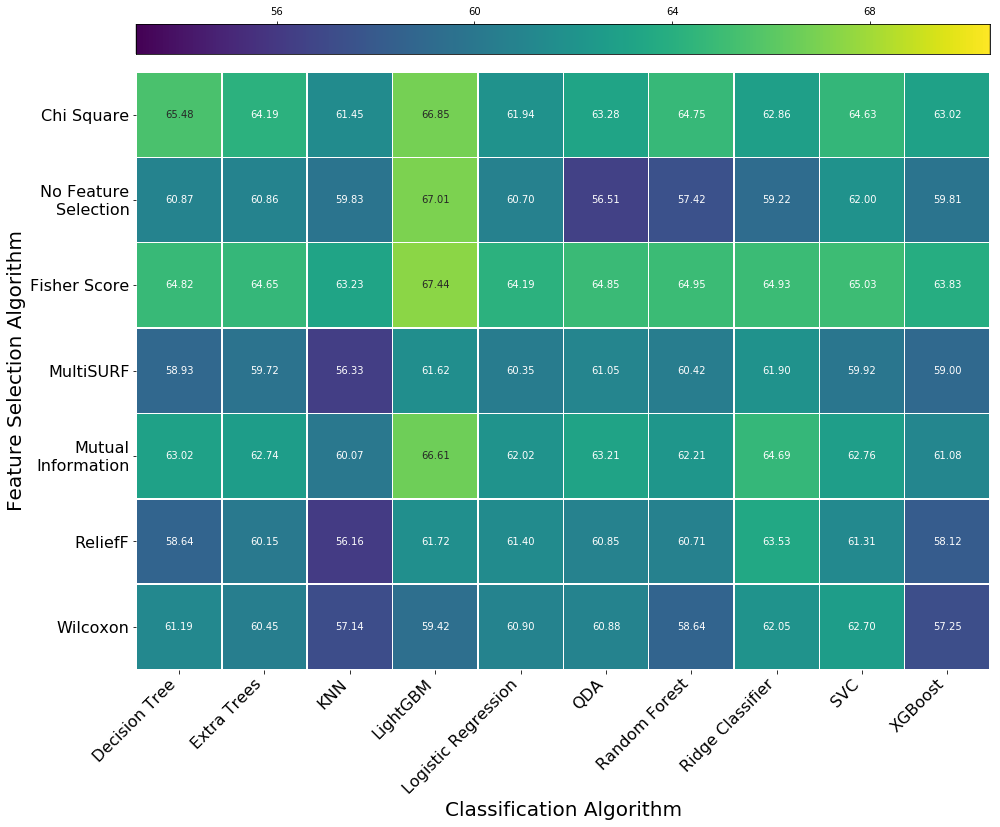

In [22]:
# Observations:
# * MultiSURF vs. ReliefF?

orig_results_mat, selector_lbls, estimator_lbls = gen_heatmap(results_orig)

fig = plt.figure(figsize=(14, 14))
hmap = sns.heatmap(
    orig_results_mat.T * 100,
    yticklabels=format_selector_labels(selector_lbls),
    xticklabels=format_estimator_labels(estimator_lbls),
    vmin=np.nanmin(orig_results_mat) * 100 - 3, 
    vmax=np.nanmax(orig_results_mat) * 100 + 3,
    cmap=plt.cm.viridis, 
    robust=True,
    annot=True, 
    fmt='.2f', 
    square=1, 
    linewidth=.5,
    cbar=False,
)
plt.xlabel('Classification Algorithm', fontsize=20)
plt.ylabel('Feature Selection Algorithm', fontsize=20, va='bottom', ha='center')

hmap.set_yticklabels(hmap.get_yticklabels(), rotation=0, fontsize=16)
hmap.set_xticklabels(
    hmap.get_xticklabels(), rotation=45, fontsize=16, 
    va='top', ha='right'
)
ax_divider = make_axes_locatable(hmap)
# define size and padding of axes for colorbar
cax = ax_divider.append_axes('top', size='5%', pad='3%')
colorbar(hmap.get_children()[0], cax=cax, orientation='horizontal')
cax.xaxis.set_ticks_position('top')

plt.tight_layout()

plt.savefig(
    './../../figures/model_comparison_results/hmap_original_images.png',
    bbox_inches='tight',
    transparent=True,
    dpi=100, 
)

In [8]:
np.sum(orig_results_mat >= 0.6767), np.max(orig_results_mat - 0.6767)

(0, -0.002339245014244873)

# Removed Broken Slices

In [10]:
results_rs = pd.read_csv(
    './../../data_source/results/removed_broken_slices/results_all_features_removed_broken_slices.csv',
    index_col=0
)
results_rs.head()

,exp_id,experiment_id,QuadraticDiscriminantEstimator__reg_param,test_score,train_score,test_score_variance,train_score_variance,feature_votes,target_test_support,target_train_support,...,RFEstimator__min_samples_leaf,RFEstimator__n_estimators,KNNEstimator__leaf_size,KNNEstimator__metric,KNNEstimator__n_neighbors,KNNEstimator__p,DTreeEstimator__criterion,DTreeEstimator__max_depth,DTreeEstimator__max_features,DTreeEstimator__min_samples_leaf
0,0,DummySelection_QuadraticDiscriminantEstimator,0.611062,0.565676,0.748192,0.003102,0.000918,[5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5...,[0 0],[640 295],...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,3,DummySelection_QuadraticDiscriminantEstimator,0.369797,0.599275,0.778007,0.017894,0.001178,[5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5...,[0 0],[640 295],...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,DummySelection_QuadraticDiscriminantEstimator,0.369797,0.599275,0.778007,0.017894,0.001178,[5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5...,[0 0],[640 295],...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,39,DummySelection_QuadraticDiscriminantEstimator,0.268076,0.578853,0.782655,0.012575,0.000866,[5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5...,[0 0],[640 295],...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,9,DummySelection_QuadraticDiscriminantEstimator,0.001188,0.631368,0.987278,0.002011,0.000064,[5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5...,[0 0],[640 295],...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
results_rs.shape

(2800, 56)

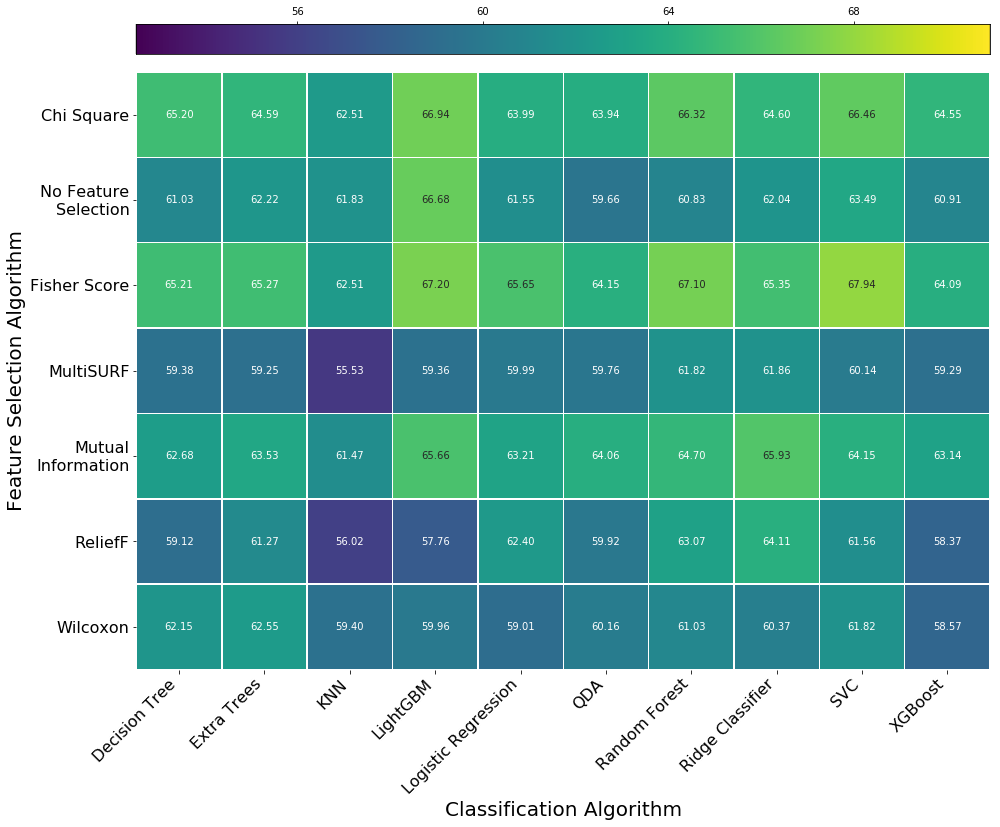

In [12]:
# Observations:
# * MultiSURF vs. ReliefF?

red_results_mat, selector_lbls, estimator_lbls = gen_heatmap(results_rs)

fig = plt.figure(figsize=(14, 14))
hmap = sns.heatmap(
    red_results_mat.T * 100,
    yticklabels=format_selector_labels(selector_lbls),
    xticklabels=format_estimator_labels(estimator_lbls),
    vmin=np.nanmin(red_results_mat) * 100 - 3, 
    vmax=np.nanmax(red_results_mat) * 100 + 3,
    cmap=plt.cm.viridis, 
    robust=True,
    annot=True, 
    fmt='.2f', 
    square=1, 
    linewidth=.5,
    cbar=False,
)
plt.xlabel('Classification Algorithm', fontsize=20)
plt.ylabel('Feature Selection Algorithm', fontsize=20, va='bottom', ha='center')

hmap.set_yticklabels(hmap.get_yticklabels(), rotation=0, fontsize=16)
hmap.set_xticklabels(
    hmap.get_xticklabels(), rotation=45, fontsize=16, 
    va='top', ha='right'
)
ax_divider = make_axes_locatable(hmap)
# define size and padding of axes for colorbar
cax = ax_divider.append_axes('top', size='5%', pad='3%')
colorbar(hmap.get_children()[0], cax=cax, orientation='horizontal')
cax.xaxis.set_ticks_position('top')

plt.tight_layout()

plt.savefig(
    './../../figures/model_comparison_results/hmap_removed_broken_slices.png',
    bbox_inches='tight',
    transparent=True,
    dpi=100, 
)

In [13]:
sum(red_results_mat > 0.684), np.max(red_results_mat - 0.684)

(array([0, 0, 0, 0, 0, 0, 0]), -0.004607167832167747)

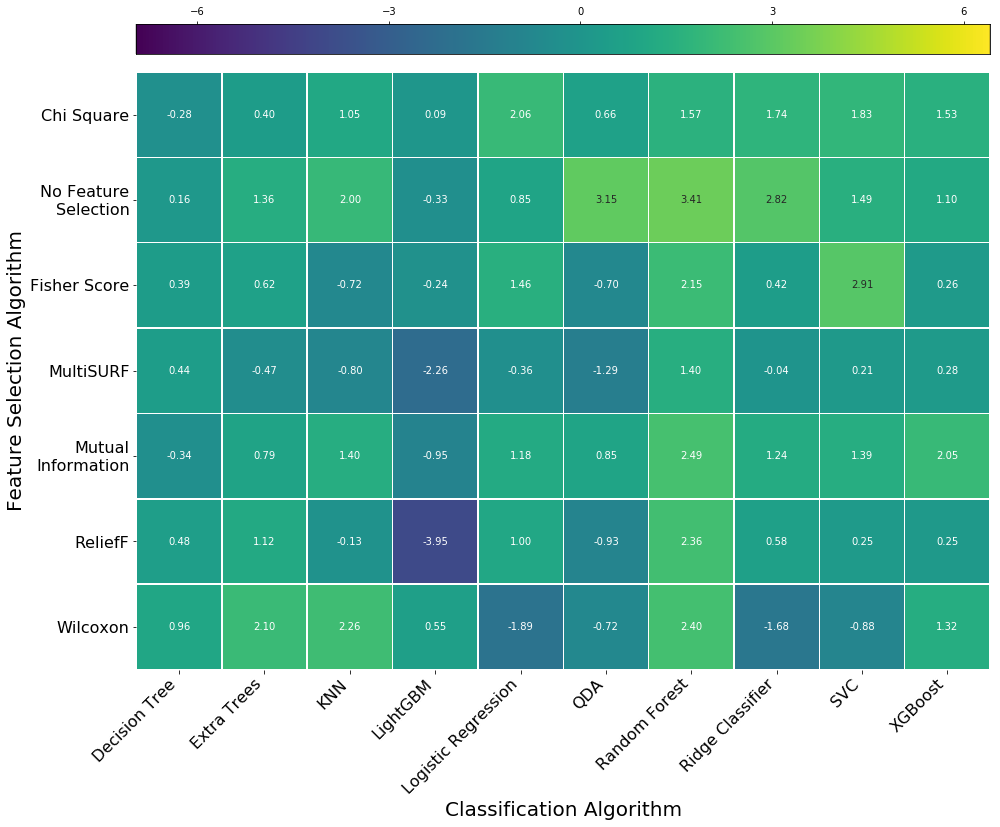

In [37]:
diff_red_orig_mat = red_results_mat - orig_results_mat

fig = plt.figure(figsize=(14, 14))
hmap = sns.heatmap(
    diff_red_orig_mat.T * 100,
    yticklabels=format_selector_labels(selector_lbls),
    xticklabels=format_estimator_labels(estimator_lbls),
    vmin=np.nanmin(diff_red_orig_mat) * 100 - 3, 
    vmax=np.nanmax(diff_red_orig_mat) * 100 + 3,
    cmap=plt.cm.viridis, 
    robust=True,
    annot=True, 
    fmt='.2f', 
    square=1, 
    linewidth=.5,
    cbar=False,
)
plt.xlabel('Classification Algorithm', fontsize=20)
plt.ylabel('Feature Selection Algorithm', fontsize=20, va='bottom', ha='center')

hmap.set_yticklabels(hmap.get_yticklabels(), rotation=0, fontsize=16)
hmap.set_xticklabels(
    hmap.get_xticklabels(), rotation=45, fontsize=16, 
    va='top', ha='right'
)
ax_divider = make_axes_locatable(hmap)
# define size and padding of axes for colorbar
cax = ax_divider.append_axes('top', size='5%', pad='3%')
colorbar(hmap.get_children()[0], cax=cax, orientation='horizontal')
cax.xaxis.set_ticks_position('top')

plt.tight_layout()

plt.savefig(
    './../../figures/model_comparison_results/diff_hmap_removed_vs_orig.png',
    bbox_inches='tight',
    transparent=True,
    dpi=100, 
)

In [38]:
np.sum(diff_red_orig_mat > 0) / (10 * 7) * 100

71.42857142857143

# Hassan Transform to Feature Space

In [14]:
results_cp = pd.read_csv(
    './../../data_source/results/hassan_original_images/results_all_features_icc.csv',
    index_col=0
)
results_cp.head()

,exp_id,experiment_id,QuadraticDiscriminantEstimator__reg_param,test_score,train_score,test_score_variance,train_score_variance,feature_votes,target_test_support,target_train_support,...,RFEstimator__min_samples_leaf,RFEstimator__n_estimators,KNNEstimator__leaf_size,KNNEstimator__metric,KNNEstimator__n_neighbors,KNNEstimator__p,DTreeEstimator__criterion,DTreeEstimator__max_depth,DTreeEstimator__max_features,DTreeEstimator__min_samples_leaf
0,0,DummySelection_QuadraticDiscriminantEstimator,0.001000,0.574145,0.961011,0.006524,0.000145,[5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5...,[0 0],[670 320],...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,3,DummySelection_QuadraticDiscriminantEstimator,0.403206,0.576709,0.727379,0.009945,0.000255,[5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5...,[0 0],[670 320],...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,DummySelection_QuadraticDiscriminantEstimator,0.403206,0.576709,0.727379,0.009945,0.000255,[5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5...,[0 0],[670 320],...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,39,DummySelection_QuadraticDiscriminantEstimator,0.268076,0.573077,0.737643,0.003202,0.000332,[5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5...,[0 0],[670 320],...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,9,DummySelection_QuadraticDiscriminantEstimator,0.070387,0.567735,0.781184,0.001714,0.000393,[5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5...,[0 0],[670 320],...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [15]:
results_cp.shape

(2800, 56)

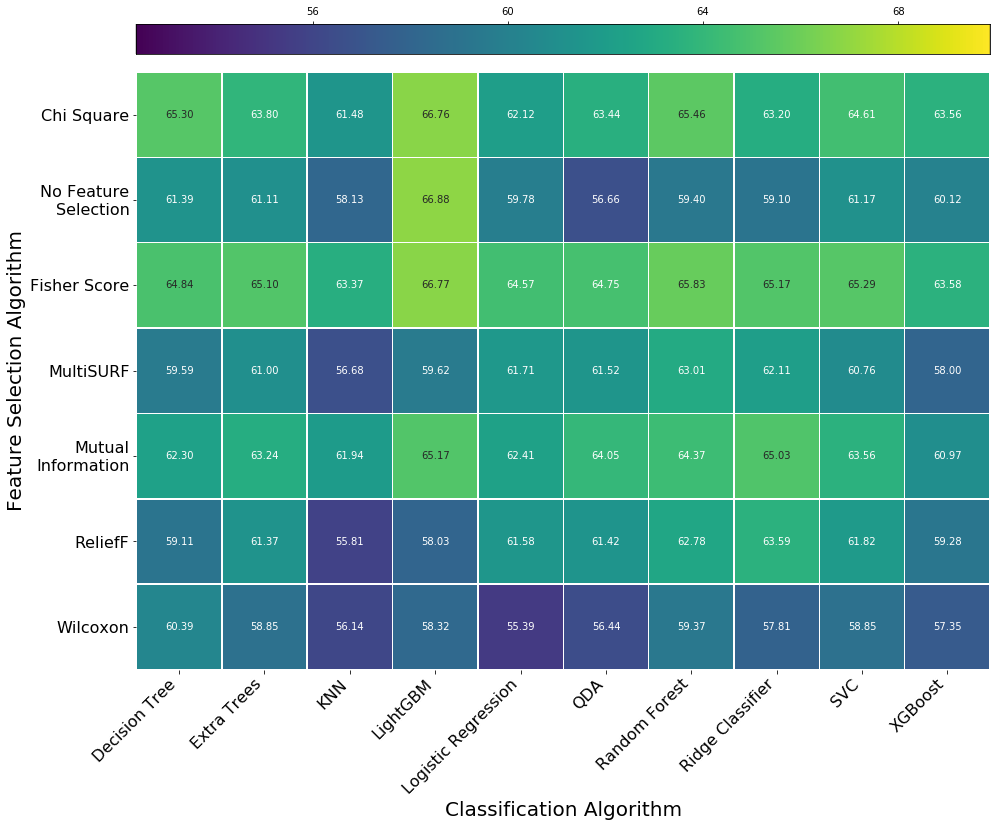

In [16]:
# Observations:
# * MultiSURF vs. ReliefF?

comp_results_mat, selector_lbls, estimator_lbls = gen_heatmap(results_cp)

fig = plt.figure(figsize=(14, 14))
hmap = sns.heatmap(
    comp_results_mat.T * 100,
    yticklabels=format_selector_labels(selector_lbls),
    xticklabels=format_estimator_labels(estimator_lbls),
    vmin=np.nanmin(comp_results_mat) * 100 - 3, 
    vmax=np.nanmax(comp_results_mat) * 100 + 3,
    cmap=plt.cm.viridis, 
    robust=True,
    annot=True, 
    fmt='.2f', 
    square=1, 
    linewidth=.5,
    cbar=False,
)
plt.xlabel('Classification Algorithm', fontsize=20)
plt.ylabel('Feature Selection Algorithm', fontsize=20, va='bottom', ha='center')

hmap.set_yticklabels(hmap.get_yticklabels(), rotation=0, fontsize=16)
hmap.set_xticklabels(
    hmap.get_xticklabels(), rotation=45, fontsize=16, 
    va='top', ha='right'
)
ax_divider = make_axes_locatable(hmap)
# define size and padding of axes for colorbar
cax = ax_divider.append_axes('top', size='5%', pad='3%')
colorbar(hmap.get_children()[0], cax=cax, orientation='horizontal')
cax.xaxis.set_ticks_position('top')

plt.tight_layout()

plt.savefig(
    './../../figures/model_comparison_results/hmap_icc_original_images.png',
    bbox_inches='tight',
    transparent=True,
    dpi=100, 
)

In [36]:
np.sum(comp_results_mat >= 0.6767), np.max(comp_results_mat - 0.6767)

(0, -0.007884116809116715)

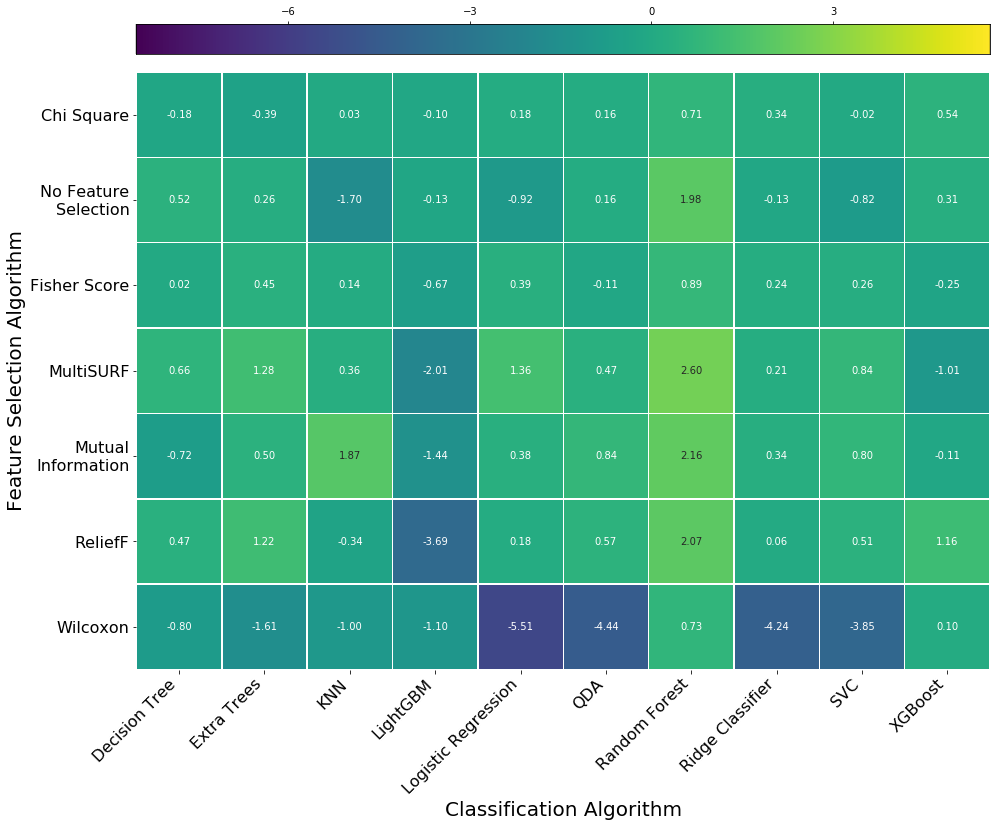

In [25]:
diff_comp_orig_mat = comp_results_mat - orig_results_mat

fig = plt.figure(figsize=(14, 14))
hmap = sns.heatmap(
    diff_comp_orig_mat.T * 100,
    yticklabels=format_selector_labels(selector_lbls),
    xticklabels=format_estimator_labels(estimator_lbls),
    vmin=np.nanmin(diff_comp_orig_mat) * 100 - 3, 
    vmax=np.nanmax(diff_comp_orig_mat) * 100 + 3,
    cmap=plt.cm.viridis, 
    robust=True,
    annot=True, 
    fmt='.2f', 
    square=1, 
    linewidth=.5,
    cbar=False,
)
plt.xlabel('Classification Algorithm', fontsize=20)
plt.ylabel('Feature Selection Algorithm', fontsize=20, va='bottom', ha='center')

hmap.set_yticklabels(hmap.get_yticklabels(), rotation=0, fontsize=16)
hmap.set_xticklabels(
    hmap.get_xticklabels(), rotation=45, fontsize=16, 
    va='top', ha='right'
)
ax_divider = make_axes_locatable(hmap)
# define size and padding of axes for colorbar
cax = ax_divider.append_axes('top', size='5%', pad='3%')
colorbar(hmap.get_children()[0], cax=cax, orientation='horizontal')
cax.xaxis.set_ticks_position('top')

plt.tight_layout()

plt.savefig(
    './../../figures/model_comparison_results/diff_hmap_icc_vs_orig.png',
    bbox_inches='tight',
    transparent=True,
    dpi=100, 
)

In [35]:
np.sum(diff_comp_orig_mat > 0) / (10 * 7) * 100

61.42857142857143

# Dropped Correlated Features